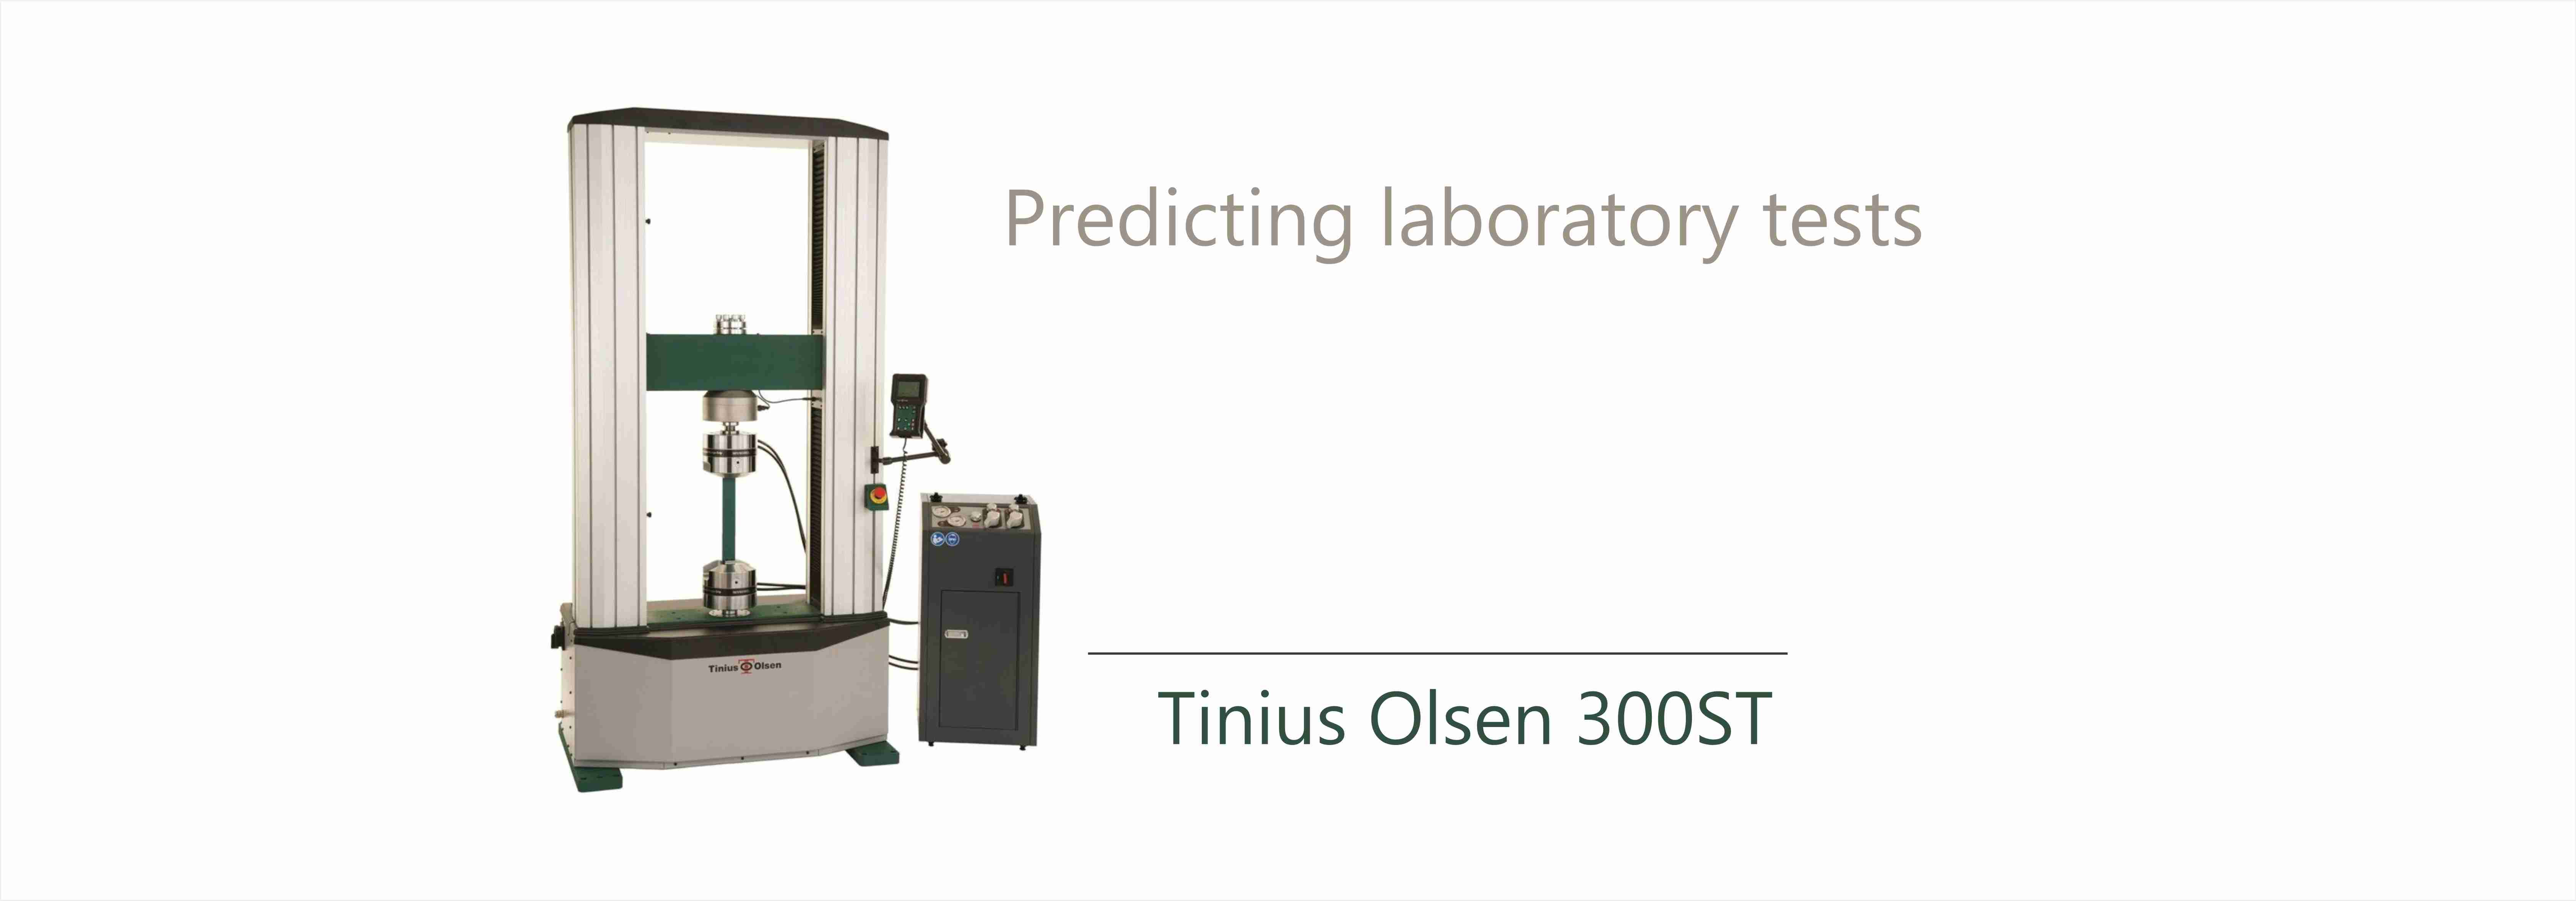

### I. Изучение и предобработка данных. Создание новых признаков.

In [4]:
# !pip install scikit-learn
# !pip install --upgrade pip
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib as mpl
from seaborn import pairplot
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [5]:
df = pd.read_csv('data_c1.csv', sep = ';', encoding = 'cp1251') #'utf-8'
df.sample(5)

,date,cipher,нд,h_мм,b_мм,Pmax_кН,P_b_МПа,Е_ГПа,p_%,v,хар_раз
3,03.12.2023,231123_15347_4215_p125-278-AF228-10L_T0_RTD,Р 56785,"2,081","25,04","39,1","750,1","56,5","1,299","0,062",ГШВ
907,30.09.2023,230925_12982_3824_p4BI-506-6L_T0_RTD,Р 56785,"1,195",15,"38,3","2136,9","135,3","1,434",NaN,ПМС
92,30.11.2023,231122_15215_4918_p125-290-AF244-10L_T0_RTD,Р 56785,"1,282","14,96","37,1","1932,8","135,5","1,302","0,43",ПМС
370,11.11.2023,231027_14371_1708_PSB250-125-273-1_T0_RTD,Р 56785,"1,898","24,97","50,52","1065,9","78,5","1,301",NaN,ГШВ
1148,11.09.2023,230717_11328_1_1-1-01-1-2-01_T0_CTD55С,Р 56785,"2,124","24,97","47,1","887,6","73,4","1,22","0,008",ГШВ


##### Колонки:

'date' - дата испытаний;

'cipher' - закодированная информация;

'нд' - некоторые требования для испытания;

'h_мм' - линейный размер;

'b_мм' - линейный размер;

'Pmax_кН' - максимальная нагрузка при которой произошло разрушение образца;

'P_b_МПа' - прочность, высчитывается: макс.нагрузка / (h * b)

'Е_ГПа' - модуль упругости = макс.нагрузка * L / S * ΔL

'p_%' - предел деформации (определяется прибором)

'v' - ..

'хар_раз' - характер разрушения.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1526 non-null   object
 1   cipher   1526 non-null   object
 2   нд       1526 non-null   object
 3   h_мм     1526 non-null   object
 4   b_мм     1526 non-null   object
 5   Pmax_кН  1526 non-null   object
 6   P_b_МПа  1526 non-null   object
 7   Е_ГПа    1526 non-null   object
 8   p_%      1526 non-null   object
 9   v        542 non-null    object
 10  хар_раз  1526 non-null   object
dtypes: object(11)
memory usage: 131.3+ KB
None


In [4]:
df = df.drop('v', axis=1) # В колонке v много пропусков, уберем ее.
df.head(1)

,date,cipher,нд,h_мм,b_мм,Pmax_кН,P_b_МПа,Е_ГПа,p_%,хар_раз
0,03.12.2023,231123_15347_4215_p125-278-AF228-10L_T0_RTD,Р 56785,"2,098","25,01","45,2","861,5","56,8","1,48",ГРС


***
Поработаем с вещественными признаками: заменим запятые на точки и приведем тип данных к float.

In [5]:
# Перечисляем столбцы, в которых нужно заменить запятые на точки
columns_to_convert = ['h_мм', 'b_мм', 'Pmax_кН', 'P_b_МПа', 'Е_ГПа', 'p_%']

for col in columns_to_convert:
    if col in df.columns:  
        df[col] = df[col].str.replace(',', '.', regex=False)  # Заменяем запятые на точки# Перечисляем столбцы, в которых нужно заменить запятые на точки
columns_to_convert = ['h_мм', 'b_мм', 'Pmax_кН', 'P_b_МПа', 'Е_ГПа', 'p_%']

for col in columns_to_convert:
    if col in df.columns:  
        df[col] = df[col].str.replace(',', '.', regex=False)  

columns_to_convert = ['h_мм', 'b_мм', 'Pmax_кН', 'P_b_МПа', 'Е_ГПа', 'p_%']
for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '.', regex=False)

# Теперь преобразуем строки в числа с плавающей точкой
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Мы присваиваем изменения непосредственно исходному датафрейму data
# Теперь data_real будет содержать измененные столбцы с числами с плавающей точкой
data_real = df[columns_to_convert]

print(data_real.dtypes)
data_real.head(1)

h_мм       float64
b_мм       float64
Pmax_кН    float64
P_b_МПа    float64
Е_ГПа      float64
p_%        float64
dtype: object


,h_мм,b_мм,Pmax_кН,P_b_МПа,Е_ГПа,p_%
0,2.098,25.01,45.2,861.5,56.8,1.48


In [6]:
data_real.describe().T

,count,mean,std,min,25%,50%,75%,max
h_мм,1526.0,2.436324,2.080081,0.766,1.3415,1.9615,2.2230,13.792
b_мм,1526.0,21.668290,4.727882,14.700,15.0600,24.9800,25.0475,25.760
Pmax_кН,1526.0,41.487596,19.102057,2.080,30.4000,39.4000,48.3950,165.800
P_b_МПа,1526.0,1117.482745,700.525940,37.400,592.4750,934.4000,1736.4750,3280.700
Е_ГПа,1526.0,77.071547,44.752128,6.390,37.2475,71.6500,124.2750,188.000
p_%,1526.0,1.557467,0.589543,0.484,1.2420,1.3770,1.5890,9.194


In [7]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     1526 non-null   object 
 1   cipher   1526 non-null   object 
 2   нд       1526 non-null   object 
 3   h_мм     1526 non-null   float64
 4   b_мм     1526 non-null   float64
 5   Pmax_кН  1526 non-null   float64
 6   P_b_МПа  1526 non-null   float64
 7   Е_ГПа    1526 non-null   float64
 8   p_%      1526 non-null   float64
 9   хар_раз  1526 non-null   object 
dtypes: float64(6), object(4)
memory usage: 119.3+ KB


***
Первая колонка 'date': преобразование строк в даты, генерация дополнительных признаков из компонент даты.

In [8]:
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')
# Извлечение компонентов даты
# data['year'] = data['date'].dt.year - год не будем включать так как происходит все в текущем году.
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday
data = data.drop('date', axis=1)
data.head(1)

,cipher,нд,h_мм,b_мм,Pmax_кН,P_b_МПа,Е_ГПа,p_%,хар_раз,month,day,weekday
0,231123_15347_4215_p125-278-AF228-10L_T0_RTD,Р 56785,2.098,25.01,45.2,861.5,56.8,1.48,ГРС,12,3,6


***
Вторая колонка 'cipher'

In [9]:
data['cipher'].head(1)

0    231123_15347_4215_p125-278-AF228-10L_T0_RTD
Name: cipher, dtype: object

Заметим, что шифр состоит из 6 частей, разделенных нижним подчеркиванием.
Разделим 1 признак на 6!

In [10]:
# Разделяем колонку на несколько новых колонок
# здесь мы используем регулярное выражение '[_]' как разделитель, которое соответствует нижнему подчеркиванию
data_split = data['cipher'].str.split(r'[_]', expand=True)

# Теперь data_split содержит отдельные колонки с признаками
# Мы можем их переименовать для удобства
data_split.columns = [f'c_{i}' for i in range(1, len(data_split.columns) + 1)]

# Добавляем новые колонки в оригинальный датафрейм
data = pd.concat([data, data_split], axis=1)

# Удалим колонку'cipher' так как мы ее уже разделили на 6 частей
data = data.drop('cipher', axis=1)

# Выводим результат
data.head(3)

,нд,h_мм,b_мм,Pmax_кН,P_b_МПа,Е_ГПа,p_%,хар_раз,month,day,weekday,c_1,c_2,c_3,c_4,c_5,c_6
0,Р 56785,2.098,25.01,45.2,861.5,56.8,1.480,ГРС,12,3,6,231123,15347,4215,p125-278-AF228-10L,T0,RTD
1,Р 56785,2.087,24.99,45.8,878.6,57.5,1.484,ГШН,12,3,6,231123,15347,4215,p125-278-AF228-10L,T0,RTD
2,Р 56785,2.084,25.03,44.0,844.4,57.3,1.430,ГШВ,12,3,6,231123,15347,4215,p125-278-AF228-10L,T0,RTD


Преобразуем категориальные значения в числовые метки:

In [11]:
le = LabelEncoder()
data[['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6']] = data[['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6']].apply(le.fit_transform)
data[['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6']].head(1)

,c_1,c_2,c_3,c_4,c_5,c_6
0,72,234,98,117,1,9


***
Колонка 'нд':

In [12]:
# Уникальные значения колонки:
data['нд'].unique()

array(['Р 56785', 'ASTM D3039', ' Р 56785'], dtype=object)

In [13]:
# Нужно убрать лишние пробелы.
data['нд'] = data['нд'].str.strip()
data['нд'].unique()

array(['Р 56785', 'ASTM D3039'], dtype=object)

In [14]:
le = LabelEncoder()
# Применяем LabelEncoder к колонке 'нд'
data['нд'] = le.fit_transform(data['нд'])

In [15]:
data['нд'].unique()

array([1, 0])

In [16]:
data.head(1)

,нд,h_мм,b_мм,Pmax_кН,P_b_МПа,Е_ГПа,p_%,хар_раз,month,day,weekday,c_1,c_2,c_3,c_4,c_5,c_6
0,1,2.098,25.01,45.2,861.5,56.8,1.48,ГРС,12,3,6,72,234,98,117,1,9


***
Теперь обратим внимание на линейные размеры - их произведение это площадь сечения образца. Создадим еще один признак !

In [17]:
# Перемножение столбцов и создание нового столбца "S" в ед. изм - м. кв.
data['S'] = data['h_мм'] * data['b_мм'] * 0.001

Колонка 'хар_раз': здесь отображается характер разрушения образца в ходе испытания.

In [18]:
# Применяем LabelEncoder к колонке 'хар_разруш'
data['хар_раз'] = le.fit_transform(data['хар_раз'])
data['хар_раз'].unique()
data.head(1)

,нд,h_мм,b_мм,Pmax_кН,P_b_МПа,Е_ГПа,p_%,хар_раз,month,day,weekday,c_1,c_2,c_3,c_4,c_5,c_6,S
0,1,2.098,25.01,45.2,861.5,56.8,1.48,54,12,3,6,72,234,98,117,1,9,0.052471


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   нд       1526 non-null   int32  
 1   h_мм     1526 non-null   float64
 2   b_мм     1526 non-null   float64
 3   Pmax_кН  1526 non-null   float64
 4   P_b_МПа  1526 non-null   float64
 5   Е_ГПа    1526 non-null   float64
 6   p_%      1526 non-null   float64
 7   хар_раз  1526 non-null   int32  
 8   month    1526 non-null   int32  
 9   day      1526 non-null   int32  
 10  weekday  1526 non-null   int32  
 11  c_1      1526 non-null   int32  
 12  c_2      1526 non-null   int32  
 13  c_3      1526 non-null   int32  
 14  c_4      1526 non-null   int32  
 15  c_5      1526 non-null   int32  
 16  c_6      1526 non-null   int32  
 17  S        1526 non-null   float64
dtypes: float64(7), int32(11)
memory usage: 149.2 KB


### II Разведочный анализ данных. Визуализация:

In [20]:
# Матрица корреляции
numeric_features = data.select_dtypes(include=['float64', 'int32', 'int64'])

# целевая переменная к вещественным признакам
numeric_features['P_b_МПа'] = data['P_b_МПа']
correlation_matrix = numeric_features.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

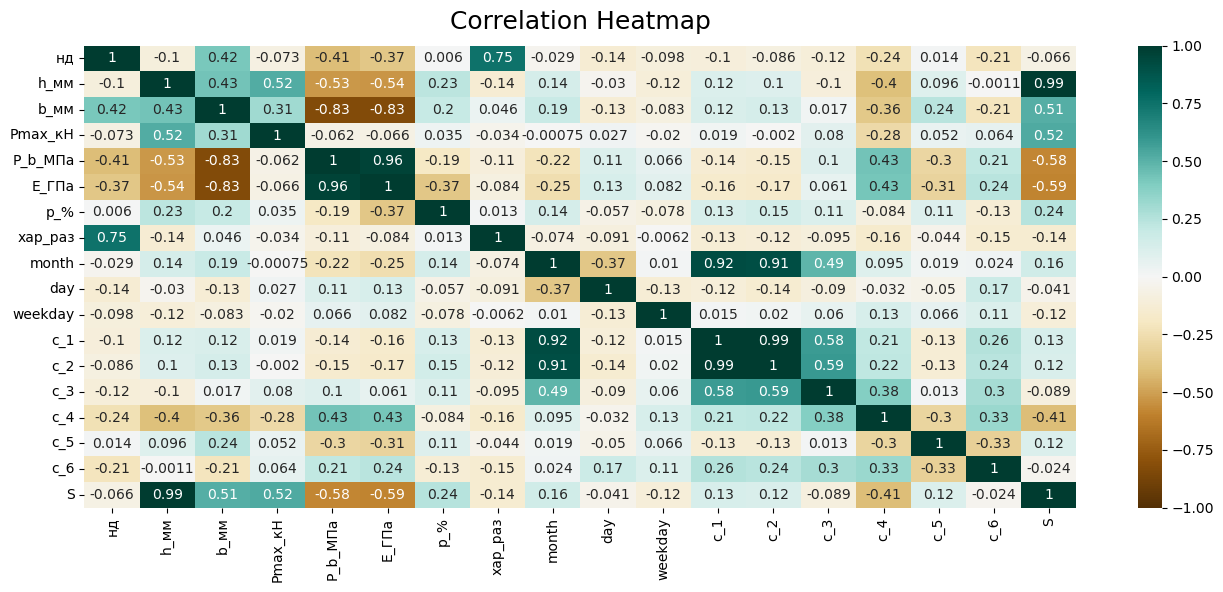

In [21]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

Смотря на матрицу, можно сделать вывод, что активно учавствуют в процессе: линейные размеры, площадь, все, что определяется лабораторным путем, и некоторые позиции из шифра тоже проявляют признаки жизни.

In [22]:
# Получение признака с наибольшей корреляцией
average_correlations = correlation_matrix.mean()
most_correlated_feature = average_correlations.idxmax()
print("Признак с наибольшей корреляцией:", most_correlated_feature)

Признак с наибольшей корреляцией: c_1


***
Найдем 5 самых прочных материалов:

In [23]:
df.nlargest(5, 'P_b_МПа')[['cipher', 'P_b_МПа', 'Е_ГПа']]

,cipher,P_b_МПа,Е_ГПа
1480,230629_10806_9_WallWrap-Lamel-500-12_T0_RTD,3280.7,174.3
1481,230629_10806_9_WallWrap-Lamel-500-12_T0_RTD,3276.5,178.9
1476,230629_10806_9_WallWrap-Lamel-500-12_T0_RTD,3184.6,174.8
1477,230629_10806_9_WallWrap-Lamel-500-12_T0_RTD,3172.4,169.0
1478,230629_10806_9_WallWrap-Lamel-500-12_T0_RTD,3099.6,167.2


Самых упругих:

In [24]:
df.nlargest(5, 'Е_ГПа')[['cipher', 'P_b_МПа', 'Е_ГПа']]

,cipher,P_b_МПа,Е_ГПа
1473,230629_10803_11_WallWrap-Lamel-500-12_T0_RTD,2663.9,188.0
1468,230629_10803_11_WallWrap-Lamel-500-12_T0_RTD,2749.6,181.2
1474,230629_10803_11_WallWrap-Lamel-500-12_T0_RTD,2725.6,180.1
1471,230629_10803_11_WallWrap-Lamel-500-12_T0_RTD,2248.5,179.6
1481,230629_10806_9_WallWrap-Lamel-500-12_T0_RTD,3276.5,178.9


Посмотрим зависимость максимальной нагрузки от площади поперечного сечения в наших данных:

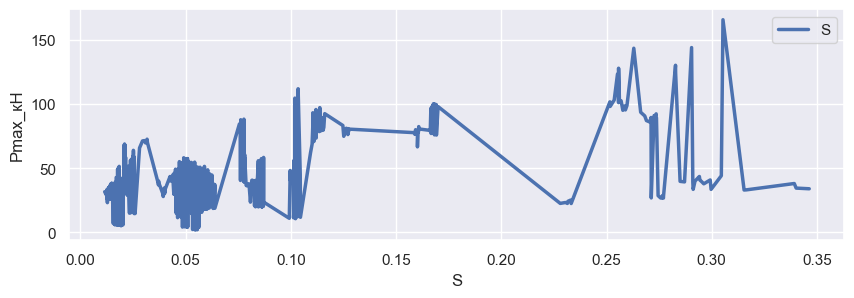

In [25]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 3))
sns.lineplot(x='S', y='Pmax_кН', data=data, linewidth=2.5, label='S')
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


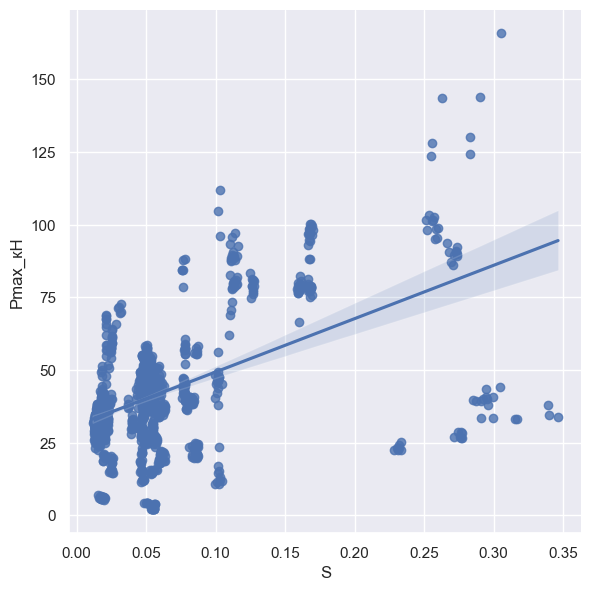

In [26]:
sns.pairplot(
    data,
    y_vars='Pmax_кН',
    x_vars=[ 'S'],
    height=6,
    kind='reg',
    diag_kind=None
);

Можно сказать, что с увеличением площади возрастает нагрузка. Но не всегда. Образцы материала заказчики приносят с разными характеристиками.

Давайте попробуем доказать зависимость:

In [27]:
data[['Pmax_кН', 'S']].corr()['Pmax_кН']

Pmax_кН    1.000000
S          0.523629
Name: Pmax_кН, dtype: float64

In [28]:
model = smf.ols('Pmax_кН ~ S', data=data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Pmax_кН   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     575.7
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          3.46e-108
Time:                        18:44:08   Log-Likelihood:                -6421.7
No. Observations:                1526   AIC:                         1.285e+04
Df Residuals:                    1524   BIC:                         1.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0280      0.603     51.450      0.0

Зависимость максимальной нагрузки от площади сечения есть.

***
Зависимость прочности от зашифрованных данных:

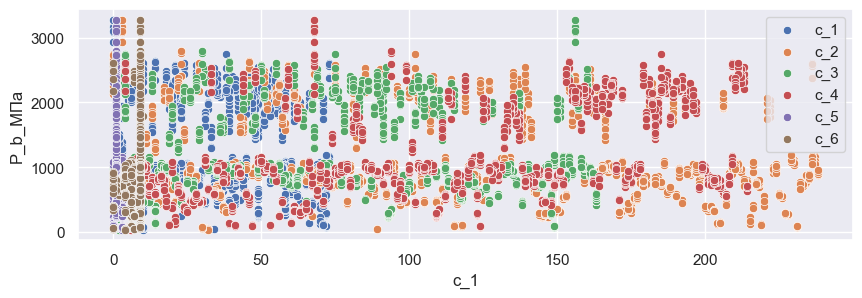

In [29]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 3))
sns.scatterplot(x='c_1', y='P_b_МПа', data=data, label='c_1')
sns.scatterplot(x='c_2', y='P_b_МПа', data=data, label='c_2')
sns.scatterplot(x='c_3', y='P_b_МПа', data=data, label='c_3')
sns.scatterplot(x='c_4', y='P_b_МПа', data=data, label='c_4')
sns.scatterplot(x='c_5', y='P_b_МПа', data=data, label='c_5')
sns.scatterplot(x='c_6', y='P_b_МПа', data=data, label='c_6')
plt.show()

In [30]:
data[['P_b_МПа', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6']].corr()['P_b_МПа'] # Зависимость прочности

P_b_МПа    1.000000
c_1       -0.139070
c_2       -0.149578
c_3        0.102375
c_4        0.432318
c_5       -0.295711
c_6        0.211968
Name: P_b_МПа, dtype: float64

In [31]:
data[['Е_ГПа', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6']].corr()['Е_ГПа'] # Зависимость модуля упругости

Е_ГПа    1.000000
c_1     -0.156652
c_2     -0.171203
c_3      0.061132
c_4      0.429176
c_5     -0.312303
c_6      0.235351
Name: Е_ГПа, dtype: float64

In [32]:
model = smf.ols('P_b_МПа ~ c_1 + c_2 + c_3 + c_4 + c_5 + c_6', data=data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                P_b_МПа   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.30e-123
Time:                        18:44:09   Log-Likelihood:                -11868.
No. Observations:                1526   AIC:                         2.375e+04
Df Residuals:                    1519   BIC:                         2.379e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1033.1615     87.381     11.824      0.0

In [33]:
model = smf.ols('Е_ГПа ~ c_1 + c_2 + c_3 + c_4 + c_5 + c_6', data=data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Е_ГПа   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     131.4
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          3.94e-134
Time:                        18:44:09   Log-Likelihood:                -7646.3
No. Observations:                1526   AIC:                         1.531e+04
Df Residuals:                    1519   BIC:                         1.534e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.0395      5.493     12.204      0.0

Зависимость есть.
***

Распределение 'Pmax_кН',	'P_b_МПа',	'Е_ГПа',	'p_%':

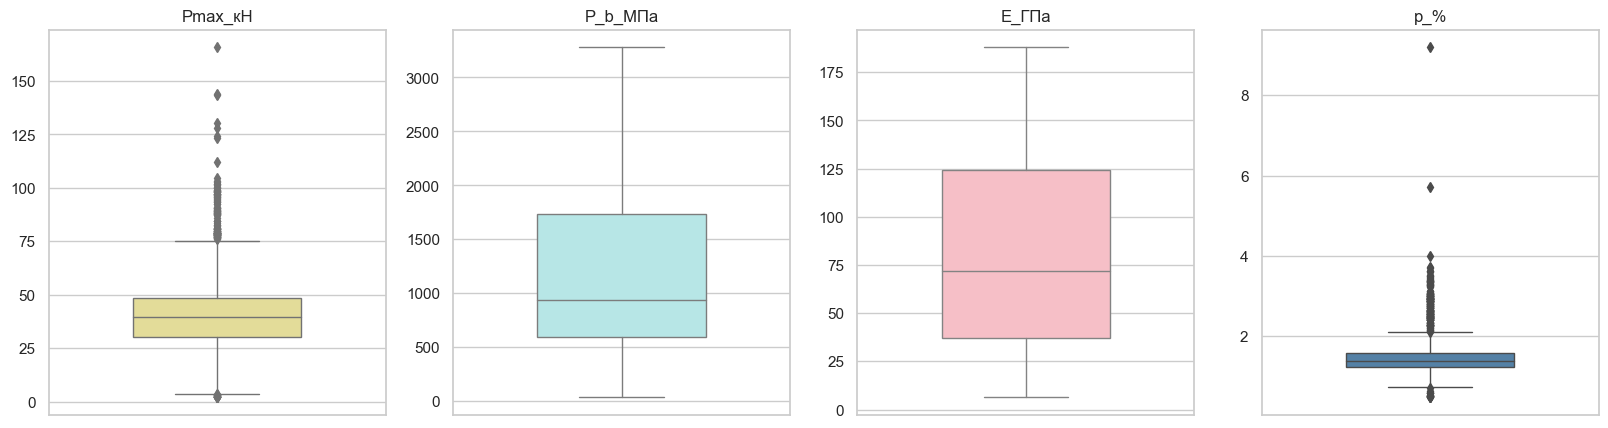

In [34]:
sns.set_theme(style="whitegrid")
# Создание "ящиков с усами" с помощью seaborn
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Создание одного ряда с 4 графиками
sns.boxplot(y='Pmax_кН', data=data, width=0.5, linewidth=1, palette=["#F0E68C"], ax=axs[0])
sns.boxplot(y='P_b_МПа', data=data, width=0.5, linewidth=1, palette=["#AFEEEE"], ax=axs[1])
sns.boxplot(y='Е_ГПа', data=data, width=0.5, linewidth=1, palette=["#FFB6C1"], ax=axs[2])
sns.boxplot(y='p_%', data=data, width=0.5, linewidth=1, palette=["#4682B4"], ax=axs[3])

axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[3].set_ylabel('')

# Заголовки
axs[0].set_title('Pmax_кН')
axs[1].set_title('P_b_МПа')
axs[2].set_title('Е_ГПа')
axs[3].set_title('p_%')

plt.show()

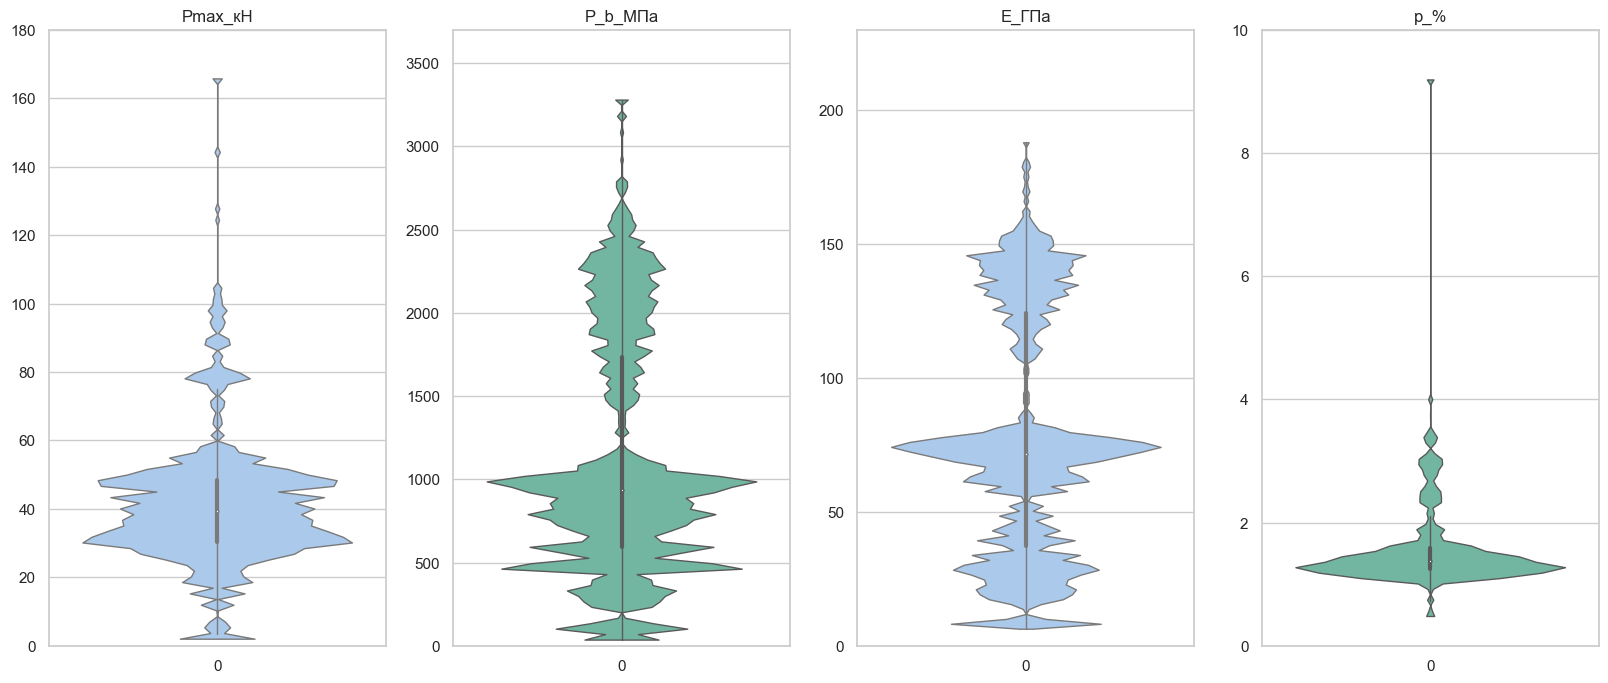

In [35]:
# Создание скрипичных диаграмм
f, ax = plt.subplots(1, 4, figsize=(20, 8))

# Настройка стиля seaborn
sns.set_theme(style="whitegrid")

# Настройка графиков для данных из data
sns.violinplot(data=data['Pmax_кН'], ax=ax[0], bw=0.01, cut=0.01, linewidth=1, palette="pastel")
ax[0].set(ylim=(0, 180))
ax[0].set_title('Pmax_кН')

sns.violinplot(data=data['P_b_МПа'], ax=ax[1], bw=0.01, cut=0.01, linewidth=1, palette="Set2")
ax[1].set(ylim=(0, 3700))
ax[1].set_title('P_b_МПа')

sns.violinplot(data=data['Е_ГПа'], ax=ax[2], bw=0.01, cut=0.01, linewidth=1, palette="pastel")
ax[2].set(ylim=(0, 230))
ax[2].set_title('Е_ГПа')

sns.violinplot(data=data['p_%'], ax=ax[3], bw=0.01, cut=0.01, linewidth=1, palette="Set2")
ax[3].set(ylim=(0, 10))
ax[3].set_title('p_%')

plt.show()

Еще раз посмотрим на распредение прочности и модуля упругости:

(нам это пригодится в задаче кластеризации)

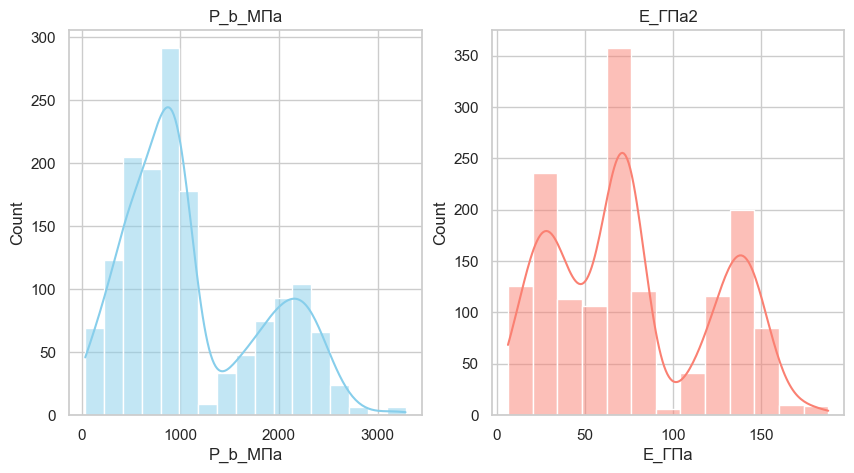

In [36]:
# Создаем сетку для графиков
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Строим две гистограммы в ряд
sns.histplot(data=df, x="P_b_МПа", color="skyblue", kde=True, ax=axs[0])
axs[0].set_title('P_b_МПа')
sns.histplot(data=df, x="Е_ГПа", color="salmon", kde=True, ax=axs[1])
axs[1].set_title('Е_ГПа2')

plt.show()

Мы не знаем, какие виды материалов зашифрованы в входных данных, можем сделать некоторые предположения.

In [37]:
# Обратим внимание на первую колонку:
# data_split['c_1'].unique()
# Очень похоже на датировку заказа.
data_split.head(2)

,c_1,c_2,c_3,c_4,c_5,c_6
0,231123,15347,4215,p125-278-AF228-10L,T0,RTD
1,231123,15347,4215,p125-278-AF228-10L,T0,RTD


Признак с_4 больше всех зависит от характеристик материала. 

In [38]:
print(data[['P_b_МПа', 'c_4']].corr()['P_b_МПа'])
print(data[['Е_ГПа', 'c_4']].corr()['Е_ГПа'])

P_b_МПа    1.000000
c_4        0.432318
Name: P_b_МПа, dtype: float64
Е_ГПа    1.000000
c_4      0.429176
Name: Е_ГПа, dtype: float64


### III Машинное обучение:

##### Задачи регрессии:

Закодируем категориальные переменные:

In [39]:
data_encoded = pd.get_dummies(data, columns=['нд', 'хар_раз', 'month', 'day', 'weekday', 
                                             'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6'], drop_first=True)
data_encoded.head(1)

,h_мм,b_мм,Pmax_кН,P_b_МПа,Е_ГПа,p_%,S,нд_1,хар_раз_1,хар_раз_2,...,c_6_1,c_6_2,c_6_3,c_6_4,c_6_5,c_6_6,c_6_7,c_6_8,c_6_9,c_6_10
0,2.098,25.01,45.2,861.5,56.8,1.48,0.052471,True,False,False,...,False,False,False,False,False,False,False,False,True,False


Выберем таргет - прочность материала ('P_b_МПа')

In [40]:
encoded_data_X = data_encoded.drop(columns='P_b_МПа')
encoded_data_y = data_encoded['P_b_МПа']

In [41]:
#Разделение выборки на тренировочную и тестовую.
Xtrain, Xtest, ytrain, ytest = train_test_split(encoded_data_X, encoded_data_y, test_size=0.3, random_state=42)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1068, 858), (458, 858), (1068,), (458,))

In [42]:
scaler = StandardScaler()
# Масштабируем вещественные признаки в тренировочной и тестовой выборках
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [43]:
# Конвертируем масштабированные массивы в объекты Pandas DataFrame
Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=Xtrain.columns)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=Xtest.columns)

# Проверяем размеры массивов
Xtrain_scaled.shape, Xtest_scaled.shape, ytrain.shape, ytest.shape

((1068, 858), (458, 858), (1068,), (458,))

In [44]:
# Создаем экземпляр класса LinearRegression
model = LinearRegression()

# Обучаем модель на тренировочной выборке
model.fit(Xtrain_scaled, ytrain)

# Предсказываем значения целевой переменной на тренировочной и тестовой выборках
ytrain_pred = model.predict(Xtrain_scaled)
ytest_pred = model.predict(Xtest_scaled)

# Рассчитываем MAE
mae_train = mean_absolute_error(ytrain, ytrain_pred)
mae_test = mean_absolute_error(ytest, ytest_pred)

# Вычисляем MSE (среднеквадратическую ошибку)
mse_train = mean_squared_error(ytrain, ytrain_pred)
mse_test = mean_squared_error(ytest, ytest_pred)

# Вычисляем r2-оценку на тренировочной и тестовой выборках
r2_train = r2_score(ytrain, ytrain_pred)
r2_test = r2_score(ytest, ytest_pred)

print("MAE на тренировочной выборке:", mae_train)
print("MAE на тестовой выборке:", mae_test)
print("MSE на тренировочной выборке:", mse_train)
print("MSE на тестовой выборке:", mse_test)
print('R2-score на тренировочной выборке:', r2_train)
print('R2-score на тестовой выборке:', r2_test)

MAE на тренировочной выборке: 39.72404761913287
MAE на тестовой выборке: 253364783426582.9
MSE на тренировочной выборке: 2898.1357504327793
MSE на тестовой выборке: 2.47478221293207e+30
R2-score на тренировочной выборке: 0.9940585130319403
R2-score на тестовой выборке: -4.994627677713997e+24


Линейная модель не очень хочет работать на наших данных.
***
Попробуем 'деревянную':

In [45]:
# Создаем экземпляр класса RandomForestRegressor
model = RandomForestRegressor(random_state=48)

# Обучаем модель на тренировочной выборке
model.fit(Xtrain_scaled, ytrain)

# Предсказываем значения целевой переменной на тренировочной и тестовой выборках
ytrain_pred = model.predict(Xtrain_scaled)
ytest_pred = model.predict(Xtest_scaled)

# Рассчитываем MAE
mae_train = mean_absolute_error(ytrain, ytrain_pred)
mae_test = mean_absolute_error(ytest, ytest_pred)

# Вычисляем MSE (среднеквадратическую ошибку)
mse_train = mean_squared_error(ytrain, ytrain_pred)
mse_test = mean_squared_error(ytest, ytest_pred)

# Вычисляем R2 (коэффициент детерминации) на тренировочной и тестовой выборках
r2_train = r2_score(ytrain, ytrain_pred)
r2_test = r2_score(ytest, ytest_pred)

print("MAE на тренировочной выборке:", mae_train)
print("MAE на тестовой выборке:", mae_test)
print("MSE на тренировочной выборке:", mse_train)
print("MSE на тестовой выборке:", mse_test)
print('R2-score на тренировочной выборке:', r2_train)
print('R2-score на тестовой выборке:', r2_test)

MAE на тренировочной выборке: 9.67074441947562
MAE на тестовой выборке: 27.21239133187772
MSE на тренировочной выборке: 304.99134176627234
MSE на тестовой выборке: 2366.458227430169
R2-score на тренировочной выборке: 0.999374735264832
R2-score на тестовой выборке: 0.9952239927622265


Уже намного лучше!

In [46]:
# Получаем важности признаков из обученной модели
feature_importances = model.feature_importances_

# Имена столбцов (признаков)
feature_names = Xtrain.columns

# Находим индекс максимальной важности
max_importance_index = feature_importances.argmax()

# Находим имя и уровень величия самого важного признака
most_important_feature_name = feature_names[max_importance_index]
most_important_importance = feature_importances[max_importance_index]

# Выводим на экран наиболее важный признак
print(f"Самый важный признак: {most_important_feature_name}")
print(f"Уровень важности: {most_important_importance}")

Самый важный признак: Е_ГПа
Уровень важности: 0.926811971384852


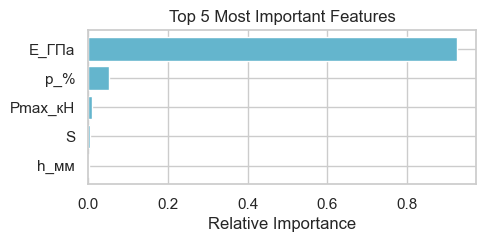

In [47]:
# Сортируем признаки по убыванию важности
indices = np.argsort(feature_importances)[::-1]
# Выбираем 5 самых важных признаков
top_k = 5
top_indices = indices[:top_k]
top_features = feature_names[top_indices]
top_importances = feature_importances[top_indices]
# Строим график
plt.figure(figsize=(5, 2))
plt.barh(range(top_k), top_importances[::-1], align='center', color = 'c')
plt.yticks(range(top_k), top_features[::-1])
plt.xlabel('Relative Importance')
plt.title('Top 5 Most Important Features')
plt.show()

Поэксперементируем с градиентным бустингом:

In [48]:
model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [500],    #[100, 300, 500, 1000],
    'learning_rate': [0.4],   #[0.01, 0.1, 0.2, 0.3, 0.4, 0.6],
    'max_depth': [4],         #[3, 4, 5, 6],
    'min_samples_split': [6], #[2, 4, 6],
    'loss': ['huber']         #['quantile', 'huber', 'squared_error', 'absolute_error']
}

# Инициализируем GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

# Создадим объект SelectFromModel для отбора признаков
feature_selector = SelectFromModel(GradientBoostingRegressor())
Xtrain_selected = feature_selector.fit_transform(Xtrain_scaled, ytrain)

# Обучим модель на отобранных признаках
grid_search.fit(Xtrain_selected, ytrain)

# Смотрим наилучшие параметры
print("Наилучшие параметры:", grid_search.best_params_)
print()

# Используем модель с наилучшими параметрами для предсказаний
best_model = grid_search.best_estimator_
Xtest_selected = feature_selector.transform(Xtest_scaled)
ytrain_pred = best_model.predict(Xtrain_selected)
ytest_pred = best_model.predict(Xtest_selected)

# Рассчитаем метрики
mae_train = mean_absolute_error(ytrain, ytrain_pred)
mae_test = mean_absolute_error(ytest, ytest_pred)
mse_train = mean_squared_error(ytrain, ytrain_pred)
mse_test = mean_squared_error(ytest, ytest_pred)
r2_train = r2_score(ytrain, ytrain_pred)
r2_test = r2_score(ytest, ytest_pred)

# Выведем метрики
print("MAE на тренировочной выборке:", mae_train)
print("MAE на тестовой выборке:", mae_test)
print()
print("MSE на тренировочной выборке:", mse_train)
print("MSE на тестовой выборке:", mse_test)
print()
print('R2-score на тренировочной выборке:', r2_train)
print('R2-score на тестовой выборке:', r2_test)
print()
print('Наилучшие признаки:', Xtrain_scaled.columns[feature_selector.get_support()])

Наилучшие параметры: {'learning_rate': 0.4, 'loss': 'huber', 'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 500}

MAE на тренировочной выборке: 0.6492116262762618
MAE на тестовой выборке: 31.952511339064735

MSE на тренировочной выборке: 11.027762696788393
MSE на тестовой выборке: 2676.2133661012062

R2-score на тренировочной выборке: 0.9999773919119075
R2-score на тестовой выборке: 0.994598842160757

Наилучшие признаки: Index(['h_мм', 'Pmax_кН', 'Е_ГПа', 'p_%', 'S', 'c_5_1'], dtype='object')


Модель получилась немного переобученная.

Удалим все признаки, которые были получены в результате испытаний, и
у нас останутся только входные данные. Обучим модель, чтобы она определяла сразу 4 таргета:

In [49]:
data_= data.drop(['хар_раз'], axis=1)

data_encoded = pd.get_dummies(data_, columns=['нд','month', 'day', 'weekday', 
                                             'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6'], drop_first=True)

X_4 = data_encoded.drop(['Pmax_кН', 'Е_ГПа','p_%', 'P_b_МПа'], axis=1)
y1 = data_encoded['Pmax_кН']
y2 = data_encoded['P_b_МПа']
y3 = data_encoded['Е_ГПа']
y4 = data_encoded['p_%']

Используем RandomForestRegressor, так как он повел себя лучше:

In [50]:
scaler = StandardScaler()
# Масштабируем вещественные признаки в тренировочной и тестовой выборках
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# Конвертируем масштабированные массивы в объекты Pandas DataFrame
Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=Xtrain.columns)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=Xtest.columns)

# Разбиение выборки на тренировочную и тестовую
X_train, X_test, y1_train, y1_test = train_test_split(X_4, y1, test_size=0.3, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X_4, y2, test_size=0.3, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X_4, y3, test_size=0.3, random_state=42)
X_train, X_test, y4_train, y4_test = train_test_split(X_4, y4, test_size=0.3, random_state=42)

# Обучение моделей для каждой целевой переменной
model_y1 = RandomForestRegressor()
model_y1.fit(X_train, y1_train)
predicted_y1 = model_y1.predict(X_test)

model_y2 = RandomForestRegressor()
model_y2.fit(X_train, y2_train)
predicted_y2 = model_y2.predict(X_test)

model_y3 = RandomForestRegressor()
model_y3.fit(X_train, y3_train)
predicted_y3 = model_y3.predict(X_test)

model_y4 = RandomForestRegressor()
model_y4.fit(X_train, y4_train)
predicted_y4 = model_y4.predict(X_test)

In [51]:
# Вычисление метрик для каждой целевой переменной
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Предсказание на тренировочной и тестовой выборке
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # MAE на тренировочной и тестовой выборке
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # RMSE на тренировочной и тестовой выборке
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # MSE на тренировочной и тестовой выборке
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # R2-score на тренировочной и тестовой выборке
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return mae_train, mae_test, rmse_train, rmse_test, mse_train, mse_test, r2_train, r2_test

# Вывод результатов
mae_train_y1, mae_test_y1, rmse_train_y1, rmse_test_y1, mse_train_y1, mse_test_y1, r2_train_y1, r2_test_y1 = evaluate_model(model_y1, X_train, y1_train, X_test, y1_test)
print("MAE на тренировочной выборке для Pmax_кН:", mae_train_y1)
print("MAE на тестовой выборке для Pmax_кН:", mae_test_y1)
print("RMSE на тренировочной выборке для Pmax_кН:", rmse_train_y1)
print("RMSE на тестовой выборке для Pmax_кН:", rmse_test_y1)
print("MSE на тренировочной выборке для Pmax_кН:", mse_train_y1)
print("MSE на тестовой выборке для Pmax_кН:", mse_test_y1)
print('R2-score на тренировочной выборке для Pmax_кН:', r2_train_y1)
print('R2-score на тестовой выборке для Pmax_кН:', r2_test_y1)
print()

mae_train_y2, mae_test_y2, rmse_train_y2, rmse_test_y2, mse_train_y2, mse_test_y2, r2_train_y2, r2_test_y2 = evaluate_model(model_y2, X_train, y2_train, X_test, y2_test)
print("MAE на тренировочной выборке для P_b_МПа:", mae_train_y2)
print("MAE на тестовой выборке для P_b_МПа:", mae_test_y2)
print("RMSE на тренировочной выборке для P_b_МПа:", rmse_train_y2)
print("RMSE на тестовой выборке для P_b_МПа:", rmse_test_y2)
print("MSE на тренировочной выборке для P_b_МПа:", mse_train_y2)
print("MSE на тестовой выборке для P_b_МПа:", mse_test_y2)
print('R2-score на тренировочной выборке для P_b_МПа:', r2_train_y2)
print('R2-score на тестовой выборке для P_b_МПа:', r2_test_y2)
print()

mae_train_y3, mae_test_y3, rmse_train_y3, rmse_test_y3, mse_train_y3, mse_test_y3, r2_train_y3, r2_test_y3 = evaluate_model(model_y3, X_train, y3_train, X_test, y3_test)
print("MAE на тренировочной выборке для Е_ГПа:", mae_train_y3)
print("MAE на тестовой выборке для Е_ГПа:", mae_test_y3)
print("RMSE на тренировочной выборке для Е_ГПа:", rmse_train_y3)
print("RMSE на тестовой выборке для Е_ГПа:", rmse_test_y3)
print("MSE на тренировочной выборке для Е_ГПа:", mse_train_y3)
print("MSE на тестовой выборке для Е_ГПа:", mse_test_y3)
print('R2-score на тренировочной выборке для Е_ГПа:', r2_train_y3)
print('R2-score на тестовой выборке для Е_ГПа:', r2_test_y3)
print()

mae_train_y4, mae_test_y4, rmse_train_y4, rmse_test_y4, mse_train_y4, mse_test_y4, r2_train_y4, r2_test_y4 = evaluate_model(model_y4, X_train, y4_train, X_test, y4_test)
print("MAE на тренировочной выборке для p_%:", mae_train_y4)
print("MAE на тестовой выборке для p_%:", mae_test_y4)
print("RMSE на тренировочной выборке для p_%:", rmse_train_y4)
print("RMSE на тестовой выборке для p_%:", rmse_test_y4)
print("MSE на тренировочной выборке для p_%:", mse_train_y4)
print("MSE на тестовой выборке для p_%:", mse_test_y4)
print('R2-score на тренировочной выборке для p_%:', r2_train_y4)
print('R2-score на тестовой выборке для p_%:', r2_test_y4)
print()

MAE на тренировочной выборке для Pmax_кН: 0.8566994917067939
MAE на тестовой выборке для Pmax_кН: 2.160304757226034
RMSE на тренировочной выборке для Pmax_кН: 1.7855820785747456
RMSE на тестовой выборке для Pmax_кН: 3.5963452614548084
MSE на тренировочной выборке для Pmax_кН: 3.1883033593273087
MSE на тестовой выборке для Pmax_кН: 12.933699239588453
R2-score на тренировочной выборке для Pmax_кН: 0.9909542648889631
R2-score на тестовой выборке для Pmax_кН: 0.9668983768005411

MAE на тренировочной выборке для P_b_МПа: 22.81915249554125
MAE на тестовой выборке для P_b_МПа: 60.76471216261173
RMSE на тренировочной выборке для P_b_МПа: 36.25082751825339
RMSE на тестовой выборке для P_b_МПа: 93.785721009903
MSE на тренировочной выборке для P_b_МПа: 1314.1224957581571
MSE на тестовой выборке для P_b_МПа: 8795.761465347361
R2-score на тренировочной выборке для P_b_МПа: 0.9973059089168562
R2-score на тестовой выборке для P_b_МПа: 0.9822483152530238

MAE на тренировочной выборке для Е_ГПа: 1.0995

Посмотрим наглядно качество наших предсказаний:

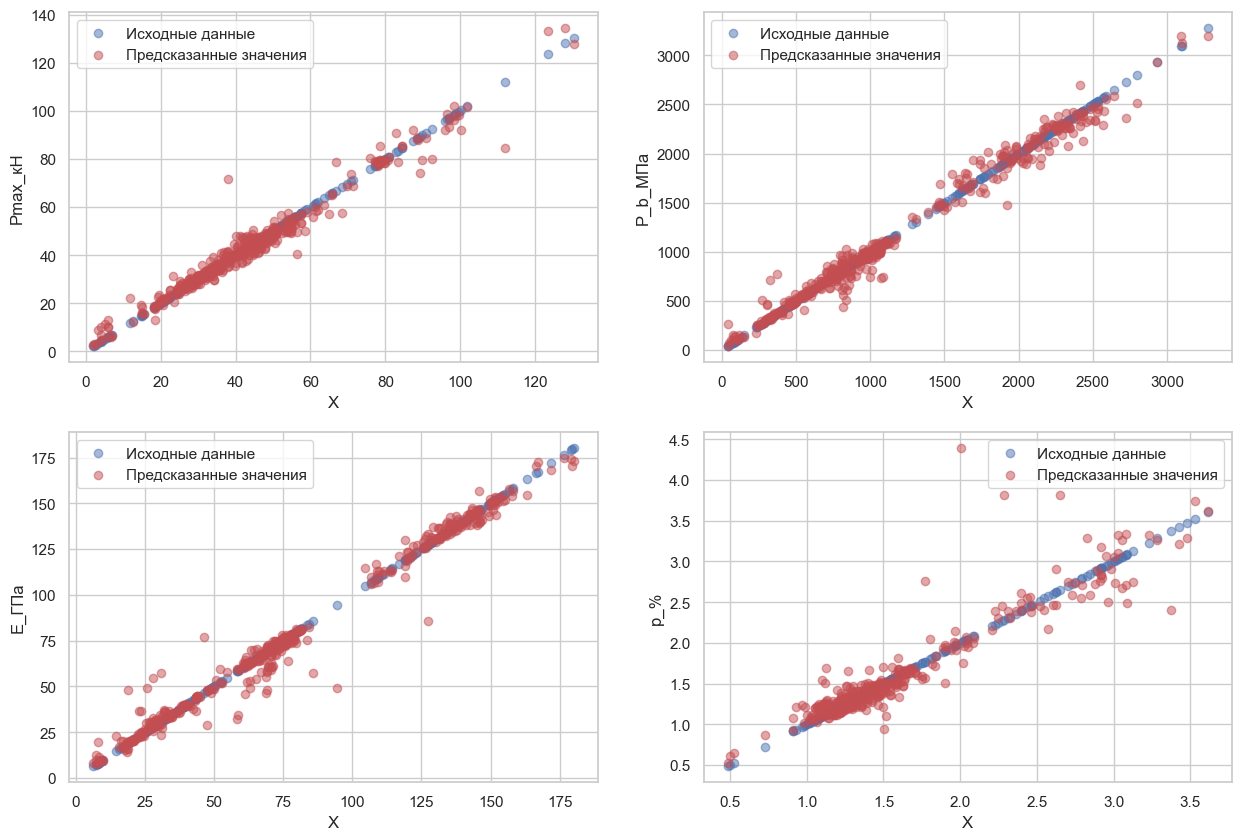

In [52]:
# Выводим графики для целевой переменной y1
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y1_test, y1_test, color='b', label='Исходные данные', alpha=0.5)
plt.scatter(y1_test, predicted_y1, color='r', label='Предсказанные значения', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Pmax_кН')
plt.legend()

# Выводим графики для целевой переменной y2
plt.subplot(2, 2, 2)
plt.scatter(y2_test, y2_test, color='b', label='Исходные данные', alpha=0.5)
plt.scatter(y2_test, predicted_y2, color='r', label='Предсказанные значения', alpha=0.5)
plt.xlabel('X')
plt.ylabel('P_b_МПа')
plt.legend()

# Выводим графики для целевой переменной y3
plt.subplot(2, 2, 3)
plt.scatter(y3_test, y3_test, color='b', label='Исходные данные', alpha=0.5)
plt.scatter(y3_test, predicted_y3, color='r', label='Предсказанные значения', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Е_ГПа')
plt.legend()

# Выводим графики для целевой переменной y4
plt.subplot(2, 2, 4)
plt.scatter(y4_test, y4_test, color='b', label='Исходные данные', alpha=0.5)
plt.scatter(y4_test, predicted_y4, color='r', label='Предсказанные значения', alpha=0.5)
plt.xlabel('X')
plt.ylabel('p_%')
plt.legend()

plt.show()

Теперь найдем ипытания, где самое большое расхождение предсказанного значения с лабораторным. Возможно, это некорректно проведенные испытания, или был материал сильно отличающийся по характеристикам.
Возьмем весь датасет без разбиения на выборки:

In [53]:
new_X_4 = data_encoded.drop(columns=['P_b_МПа', 'P_b_МПа', 'Е_ГПа', 'p_%'])

y1 = df['Pmax_кН']
y2 = df['P_b_МПа']
y3 = df['Е_ГПа']
y4 = df['p_%']

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_X_4)
X_scaled = pd.DataFrame(X_scaled, columns=new_X_4.columns)

model_y1 = RandomForestRegressor()
model_y1.fit(X_scaled, y1)
predicted_y1 = model_y1.predict(X_scaled)

model_y2 = RandomForestRegressor()
model_y2.fit(X_scaled, y2)
predicted_y2 = model_y2.predict(X_scaled)

model_y3 = RandomForestRegressor()
model_y3.fit(X_scaled, y3)
predicted_y3 = model_y3.predict(X_scaled)

model_y4 = RandomForestRegressor()
model_y4.fit(X_scaled, y4)
predicted_y4 = model_y4.predict(X_scaled)

In [55]:
# Расчет расхождения предсказанных значений с тестовыми для каждой целевой переменной
Pmax_кН = np.abs(predicted_y1 - y1)
P_b_МПа = np.abs(predicted_y2 - y2)
Е_ГПа = np.abs(predicted_y3 - y3)
p_ = np.abs(predicted_y4 - y4)

# Создание DataFrame с предсказанными значениями
predicted_df = pd.DataFrame({'cipher': df['cipher'], 'Pmax_кН': Pmax_кН, 'P_b_МПа': P_b_МПа,
                            'Е_ГПа': Е_ГПа, 'p_': p_})

# Соединение шифра и предсказанных значений
merged_df = pd.concat([df['cipher'], predicted_df['Pmax_кН'], predicted_df['P_b_МПа']
                        ,predicted_df['Е_ГПа'], predicted_df['p_']], axis=1)

# Создаем список испытаний с самой большой разностью по 4 таргетам и возьмем топ 10:
e1 = merged_df.nlargest(10, 'Pmax_кН')['cipher']
e2 = merged_df.nlargest(10, 'P_b_МПа')['cipher']
e3 = merged_df.nlargest(10, 'Е_ГПа')['cipher']
e4 = merged_df.nlargest(10, 'p_')['cipher']

# Сформируем общий список:
combined = pd.concat([e1, e2, e3, e4], axis=0)
combined = combined.unique()
e = pd.DataFrame({'Испытания с самой большой разностью': combined })
e

,Испытания с самой большой разностью
0,231003_13379_15_O-okr_T_RTD
1,231121_15154_1_2021-5-XZ_T_RTD
2,231113_14839_213_DVL-TR720_T90_RTD
3,231113_14840_213_VES-TR720_T0_RTD
4,230927_13021_3869_p47-508-5L_T0_RTD
5,230828_12336_3346_p3BI-463-6L_T0_RTD
6,230629_10803_11_WallWrap-Lamel-500-12_T0_RTD
7,231113_14923_4684_p52-412-591-5L_T0_RTD
8,231024_14244_M168_T26-10524-I2003_T0_RTD
9,230824_12257_1_OH-P11-1-2-02-125-157_T_ETW70С


In [56]:
# print(e1)
# print(e2)
# print(e3)
# print(e4)

##### Теперь перейдем к задачам кластеризации:
Попробуем привязать к признаку 'с_4' (мы предположили, что там название, вид материала) характеристики испытуемых образцов и разбить их на кластеры.

In [57]:
# Объединим в один датафрейм признак с_4 с прочностью и модулем упругости
data_k = pd.concat([data_split['c_4'], data['P_b_МПа'], data['Е_ГПа']], axis=1)
data_k.head(5)

,c_4,P_b_МПа,Е_ГПа
0,p125-278-AF228-10L,861.5,56.8
1,p125-278-AF228-10L,878.6,57.5
2,p125-278-AF228-10L,844.4,57.3
3,p125-278-AF228-10L,750.1,56.5
4,p125-278-AF228-10L,767.5,57.0


Зависимость P_b_МПа от Е_ГПа:

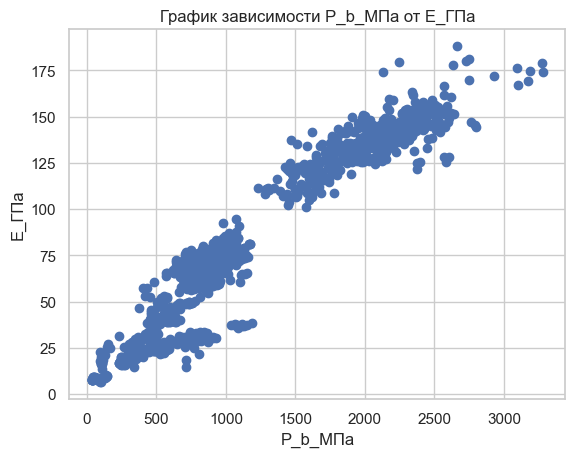

In [58]:
# Строим точечный график зависимости P_b_МПа от Е_ГПа
plt.scatter(data[['P_b_МПа']], data[['Е_ГПа']])
plt.xlabel('P_b_МПа')
plt.ylabel('Е_ГПа')
plt.title('График зависимости P_b_МПа от Е_ГПа')
plt.show()

Заметим, что наши данные "просятся" в 2 кластера.
Метод KMeans.

In [59]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_k[['P_b_МПа', 'Е_ГПа']])

# Применение кластеризации
kmeans = KMeans(n_clusters=2)
data_k['cluster'] = kmeans.fit_predict(data_scaled)

кластер_1 = data_k[data_k['cluster'] == 0]
кластер_1.describe().T

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,count,mean,std,min,25%,50%,75%,max
P_b_МПа,1062.0,701.479161,286.817936,37.40,485.375,762.35,953.925,1186.0
Е_ГПа,1062.0,50.935519,23.282113,6.39,28.525,58.90,72.600,94.5
cluster,1062.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.0


In [60]:
кластер_2 = data_k[data_k['cluster'] == 1]
кластер_2.describe().T

,count,mean,std,min,25%,50%,75%,max
P_b_МПа,464.0,2069.628879,349.784976,1231.5,1829.4,2085.35,2302.325,3280.7
Е_ГПа,464.0,136.891509,14.191060,101.0,128.4,137.85,145.300,188.0
cluster,464.0,1.000000,0.000000,1.0,1.0,1.00,1.000,1.0


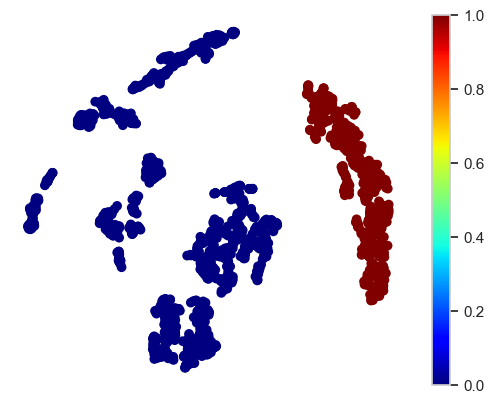

In [61]:
# Визуализация с помощью TSNE:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(data_scaled)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=data_k['cluster'], cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Выведем названия материалов (в соответствии с нашей гипотезой):

In [62]:
# Названия материалов из первой группы
кластер_1.head(3)

,c_4,P_b_МПа,Е_ГПа,cluster
0,p125-278-AF228-10L,861.5,56.8,0
1,p125-278-AF228-10L,878.6,57.5,0
2,p125-278-AF228-10L,844.4,57.3,0


In [63]:
print('Количество названий в первой группе: ', len((кластер_1['c_4']).unique()))

Количество названий в первой группе:  148


In [64]:
# Названия материалов из второй группы
кластер_2.head(3)

,c_4,P_b_МПа,Е_ГПа,cluster
24,pCn110-607-5L,2399.2,125.6,1
25,pCn110-607-5L,2371.9,124.7,1
26,pCn110-607-5L,2373.6,121.7,1


In [65]:
print('Количество названий во второй группе: ', len((кластер_2['c_4']).unique()))

Количество названий во второй группе:  68


###### Подведем итоги: 

1. Мы научились по нашим данным предсказывать прочность материала с довольно высокой точностью;

2. Нашли зависимости между входящими данными и данными, полученными лабораторным путем;

3. научились предсказывать 4 таргета по входным данным (все, что получено в ходе испытаний: макс. нагрузку, прочность, модуль упругости и предел информации).

4. кластеризовали данные на 2 группы по показателям прочности и модуля упругости.

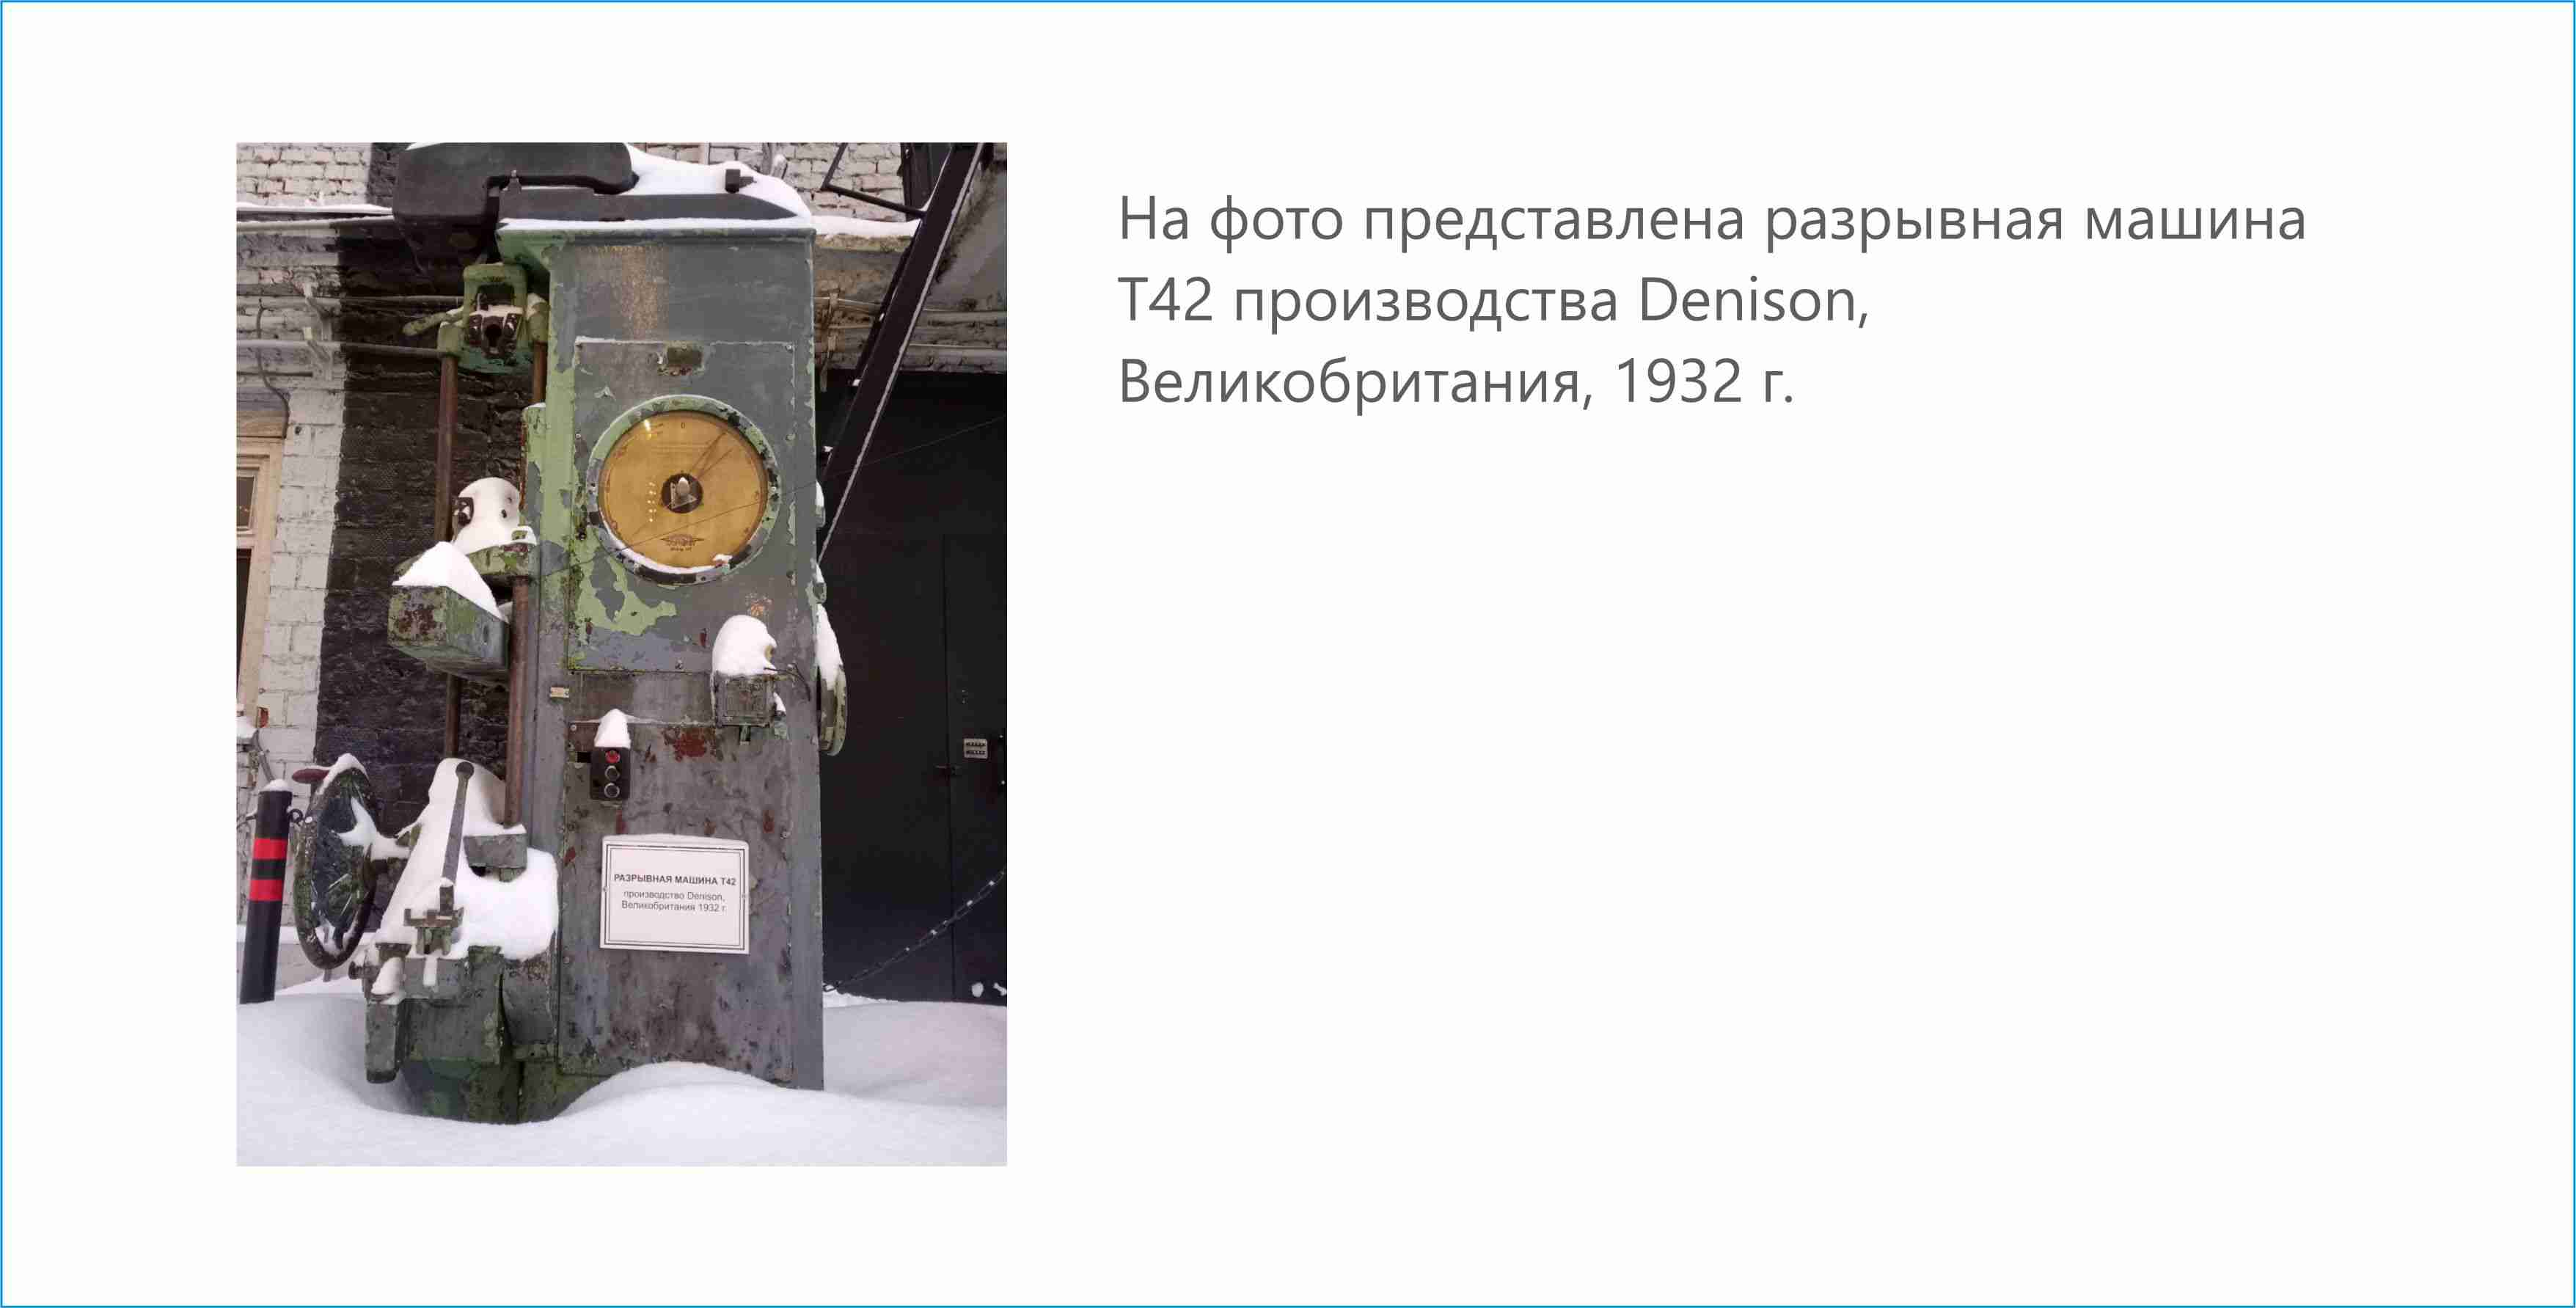